In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix

**1- Explorando dígitos escritos a mano**

**Para analizar los conceptos vistos anteriormente sobre un problema más interesante, consideremos una parte del problema del reconocimiento óptico de caracteres: la identificación de dígitos escritos a mano. En la práctica, este problema implica ubicar e identificar caracteres en una imagen.**

**a.- Cargue el dataset de imágenes de dígitos provisto por sklearn y verifique el tipo de dato importado.**

In [0]:
digits=load_digits()
type(digits)

sklearn.utils.Bunch

**b.-Verifique cuales son las claves del objeto Bunch**

In [0]:
print("Keys of digits: {}".format(digits.keys()))

Keys of digits: dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


**este conjunto de datos tiene como meta-dato las imágenes en su formato original, que
están asociadas a la clave images**

**c.- Verifique cuantas instancias tiene el dataset y cuantos son los atributos. ¿Nota algo diferente?**

In [0]:
print(digits.data.shape)
print(digits.DESCR)


(1797, 64)
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted 

Se puede observar una diferencia en la cantidad de instancias entre la presentadas mediante shape y las que presenta DESCR.

Quizas se deba a un recorte de informacion en el dataset.

**d.- Compruebe cual es la información de la primera imagen. ¿Que significan los numeros?**

In [0]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Los números del array representan la intensidad de cada pixel.

**e.- El siguiente código muestra de forma más clara la información de las primeras 100 imágenes.**

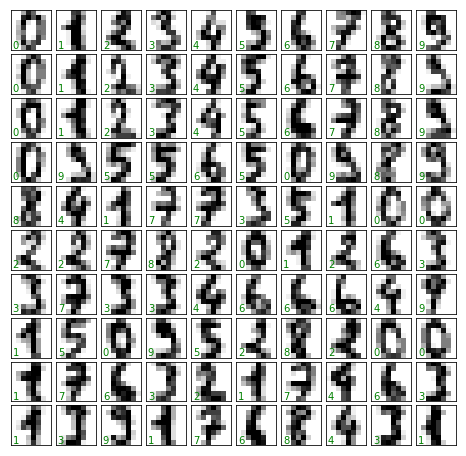

In [0]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
  ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
  ax.text(0.05, 0.05, str(digits.target[i]),
          transform=ax.transAxes, color='green')

Para trabajar con estos datos dentro de Scikit-Learn, necesitamos una representación bidimensional,
[n_samples, n_features]. Podemos lograr esto tratando cada píxel de la imagen como una característica, es decir, "aplanando" las matrices de píxels de manera tal de tener una matriz de valores de
pixels de longitud 64 que representa cada dígito. Además, necesitamos el vector objetivo, que proporciona la
etiqueta previamente determinada para cada dígito. Estas dos cantidades, como es usual, ya están
directamente disponibles en el conjunto de datos digits bajo las claves data y target, respectivamente.

**f.-Aplique el algoritmo de clasificación KNN (K=1)  a los digitos. Preeviamente divida el dataset utilizando la función de sklearn para dividir en datos de entrenamiento y test.**

**g.- Verifique el Accuracy del modelo utilizando.**

**h.-Aplique el algoritmo de clasificación KNN para K = 3,5,7,9,11. Compare la Accuracy de cada modelo.¿Cuál es el mejor K?**

In [0]:
x=digits.data

xTrain, xTest, yTrain, yTest = train_test_split(X, digits.target,
                                                random_state = 0)
scaler = MinMaxScaler()
xTrain=scaler.fit_transform(xTrain)
xTest = scaler.transform(xTest)

for i in range(1,12,2):
  model = KNeighborsClassifier(i)
  model.fit(xTrain, yTrain)
  pred=model.predict(xTest)
  print('K=',i,' Accuracy:{:.4f}' .format(accuracy_score(yTest,pred)))

K= 1  Accuracy:0.9911
K= 3  Accuracy:0.9889
K= 5  Accuracy:0.9844
K= 7  Accuracy:0.9800
K= 9  Accuracy:0.9778
K= 11  Accuracy:0.9733


**i.- ¿Como saber donde se equivoco el modelo? Utilice la librería seaborn para imprimir la matriz de confusión.**

(450, 64)

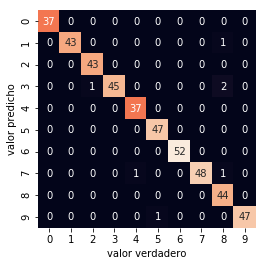

In [0]:
model=KNeighborsClassifier(5)
model.fit(xTrain,yTrain)
pred=model.predict(xTest)
mat = confusion_matrix(yTest, pred)
sns.heatmap(mat.T, square=True, annot=True, cbar=False)
plt.xlabel('valor verdadero')
plt.ylabel('valor predicho')
xTest.shape

**j.- Viendo la matriz de confusión. Que puede decir acerca de las predicciones? Cual es el número/s que tiende a ser mal etiquetado?**


En general el modelo produce buenos aciertos. Solo tiende a fallar con numeros de caracteristicas similares. El mayor numero de errores se da al confundir el numero 3 con el numero 8.

**k.- El siguiente código muestra las imágenes y las etiquetas predecidas por el clasificador.**

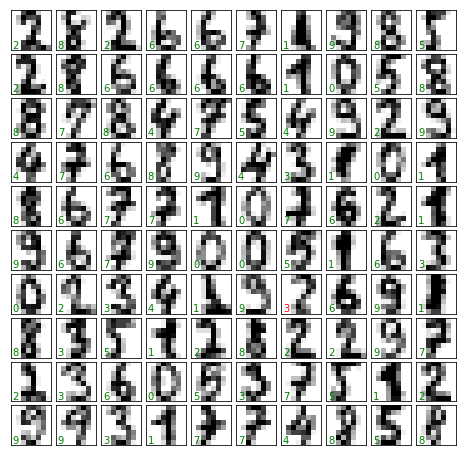

In [0]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8), 
                         subplot_kw={'xticks':[], 'yticks':[]}, 
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
test_images = xTest.reshape(-1, 8, 8)
for i, ax in enumerate(axes.flat):
  ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
  ax.text(0.05, 0.05, str(pred[i]), transform=ax.transAxes, 
          color='green' if (yTest[i] == pred[i]) else 'red')